### Project Name: Traffic Light Control System using Fuzzy Logic 
A traffic light controller using fuzzy logic for inference. Using skfuzzy library to reduce the waiting time of emergency vehicles at intersections, this fuzzy logic algorithm was designed to prioritize emergency vehicles.

#### Pre - Requisites

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5dfb8e4e19bce8c52815cad4c671b22626d10d288288c567842658b9fb1cbdb8
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


#### All the variables in our scenario

In [ ]:
no_vehicle_current_lane = ctrl.Antecedent(np.arange(0, 23, 1), 'no_vehicle_current_lane')
no_vehicle_other_lane = ctrl.Antecedent(np.arange(0, 23, 1), 'no_vehicle_other_lane')

waiting_time_current_lane = ctrl.Antecedent(np.arange(0, 100, 1), 'waiting_time_current_lane')

emergency_vehicles_in_other_lane = ctrl.Antecedent(np.arange(0, 3, 1), 'emergency_vehicles_in_other_lane')
emergency_vehicles_in_current_lane = ctrl.Antecedent(np.arange(0, 3, 1), 'emergency_vehicles_in_current_lane')

emv_waiting_time_green_lane = ctrl.Antecedent(np.arange(0, 50, 1), 'emv_waiting_time_green_lane')
emv_waiting_time_red_lane = ctrl.Antecedent(np.arange(0, 50, 1), 'emv_waiting_time_red_lane')

traffic_light_signal = ctrl.Consequent(np.arange(0, 2, 1), 'traffic_light_signal')

#### Membership Functions

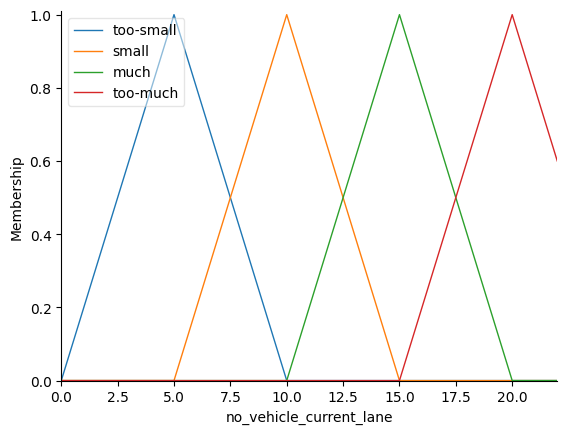

In [ ]:
no_vehicle_current_lane['too-small'] = fuzz.trimf(no_vehicle_current_lane.universe, [0, 5, 10])
no_vehicle_current_lane['small'] = fuzz.trimf(no_vehicle_current_lane.universe, [5, 10, 15])
no_vehicle_current_lane['much'] = fuzz.trimf(no_vehicle_current_lane.universe, [10, 15, 20])
no_vehicle_current_lane['too-much'] = fuzz.trimf(no_vehicle_current_lane.universe, [15, 20, 25])
no_vehicle_current_lane.view()

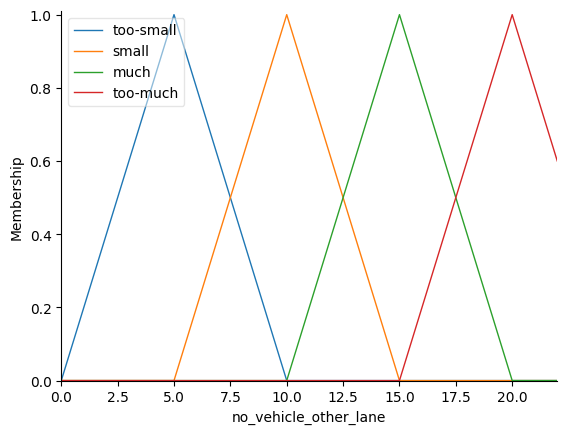

In [ ]:
no_vehicle_other_lane['too-small'] = fuzz.trimf(no_vehicle_other_lane.universe, [0, 5, 10])
no_vehicle_other_lane['small'] = fuzz.trimf(no_vehicle_other_lane.universe, [5, 10, 15])
no_vehicle_other_lane['much'] = fuzz.trimf(no_vehicle_other_lane.universe, [10, 15, 20])
no_vehicle_other_lane['too-much'] = fuzz.trimf(no_vehicle_other_lane.universe,[ 15,20, 25])
no_vehicle_other_lane.view()

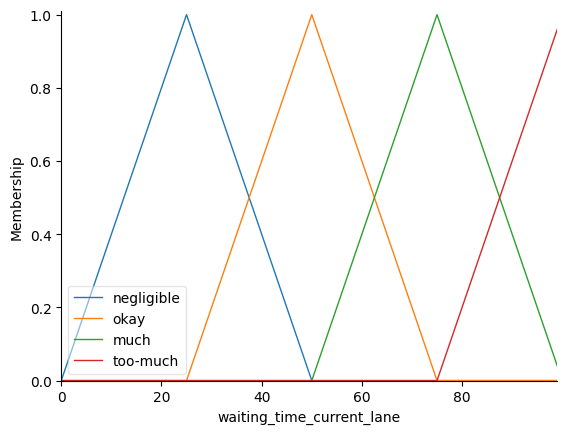

In [ ]:
waiting_time_current_lane['negligible'] = fuzz.trimf(waiting_time_current_lane.universe, [0, 25, 50])
waiting_time_current_lane['okay'] = fuzz.trimf(waiting_time_current_lane.universe, [25, 50, 75])
waiting_time_current_lane['much'] = fuzz.trimf(waiting_time_current_lane.universe, [50, 75, 100])
waiting_time_current_lane['too-much'] = fuzz.trimf(waiting_time_current_lane.universe,[75, 100, 125])
waiting_time_current_lane.view()

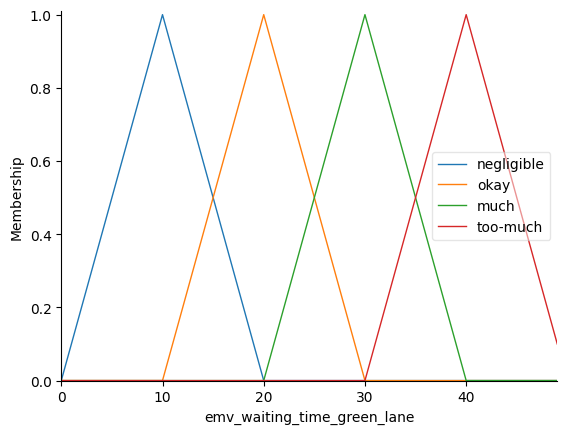

In [ ]:
emv_waiting_time_green_lane['negligible'] = fuzz.trimf(emv_waiting_time_green_lane.universe, [0, 10,20])
emv_waiting_time_green_lane['okay'] = fuzz.trimf(emv_waiting_time_green_lane.universe, [10, 20, 30])
emv_waiting_time_green_lane['much'] = fuzz.trimf(emv_waiting_time_green_lane.universe, [20, 30, 40])
emv_waiting_time_green_lane['too-much'] = fuzz.trimf(emv_waiting_time_green_lane.universe,[30 , 40, 50])
emv_waiting_time_green_lane.view()

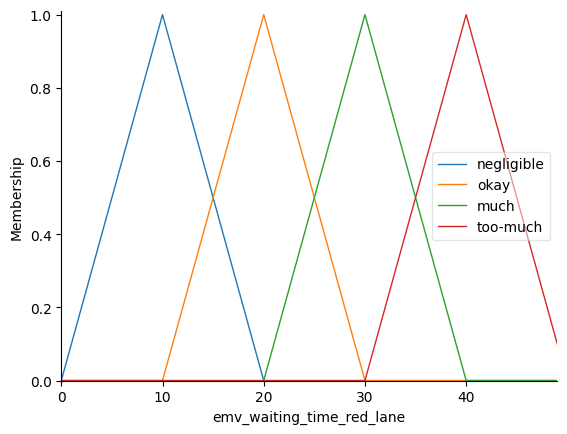

In [ ]:
emv_waiting_time_red_lane['negligible'] = fuzz.trimf(emv_waiting_time_red_lane.universe, [0, 10, 20])
emv_waiting_time_red_lane['okay'] = fuzz.trimf(emv_waiting_time_red_lane.universe, [10, 20, 30])
emv_waiting_time_red_lane['much'] = fuzz.trimf(emv_waiting_time_red_lane.universe, [20, 30, 40])
emv_waiting_time_red_lane['too-much'] = fuzz.trimf(emv_waiting_time_red_lane.universe,[30, 40,50])
emv_waiting_time_red_lane.view()

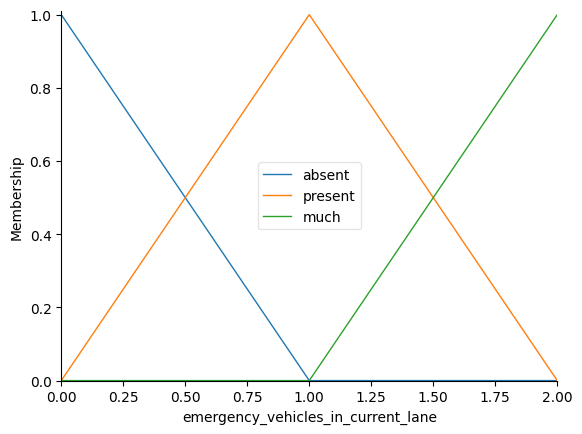

In [ ]:
emergency_vehicles_in_current_lane['absent'] = fuzz.trimf(emergency_vehicles_in_current_lane.universe,[0,0, 1])
emergency_vehicles_in_current_lane['present'] = fuzz.trimf(emergency_vehicles_in_current_lane.universe,[0, 1,2])
emergency_vehicles_in_current_lane['much'] = fuzz.trimf(emergency_vehicles_in_current_lane.universe, [1, 2,3])
emergency_vehicles_in_current_lane.view()

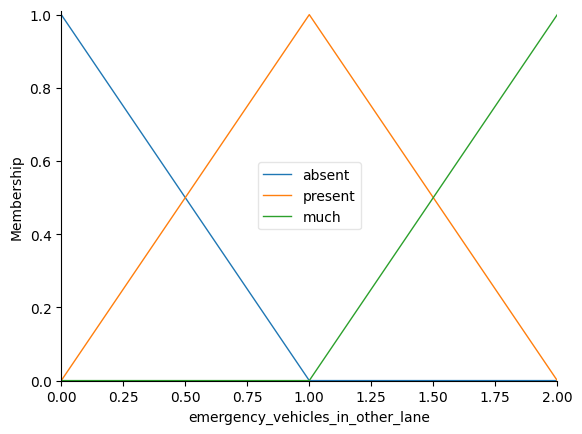

In [ ]:
emergency_vehicles_in_other_lane['absent'] = fuzz.trimf(emergency_vehicles_in_other_lane.universe,[0,0, 1])
emergency_vehicles_in_other_lane['present'] = fuzz.trimf(emergency_vehicles_in_other_lane.universe,[0, 1,2])
emergency_vehicles_in_other_lane['much'] = fuzz.trimf(emergency_vehicles_in_other_lane.universe, [1, 2,3])
emergency_vehicles_in_other_lane.view()

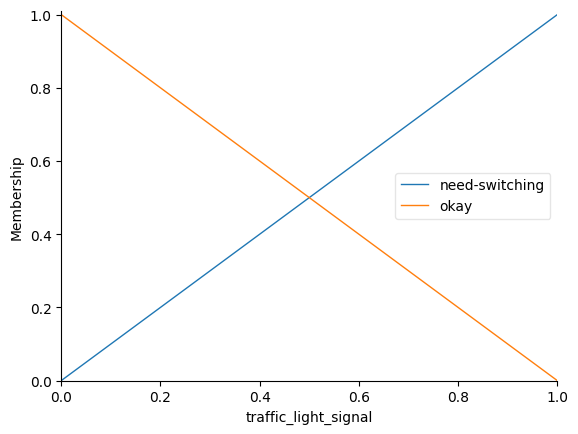

In [ ]:
traffic_light_signal['need-switching'] = fuzz.smf(traffic_light_signal.universe, 0, 1)
traffic_light_signal['okay'] = fuzz.zmf(traffic_light_signal.universe, 0, 1)
traffic_light_signal.view()

#### Rules

In [ ]:
rule0a = ctrl.Rule(emergency_vehicles_in_current_lane['much'] & emergency_vehicles_in_other_lane['absent']
                   | emergency_vehicles_in_current_lane['present'] & emergency_vehicles_in_other_lane['absent']
                   | emergency_vehicles_in_current_lane['much'] & emergency_vehicles_in_other_lane['present'],
                   traffic_light_signal['okay'])

rule0b = ctrl.Rule(emergency_vehicles_in_current_lane['absent'] & emergency_vehicles_in_other_lane['present']
                   | emergency_vehicles_in_current_lane['present'] & emergency_vehicles_in_other_lane['much']
                   | emergency_vehicles_in_current_lane['absent'] & emergency_vehicles_in_other_lane['much'],
                   traffic_light_signal['need-switching'])

In [ ]:
rule1a = ctrl.Rule(no_vehicle_current_lane['small'] & no_vehicle_other_lane['too-small']
                   | no_vehicle_current_lane['much'] & no_vehicle_other_lane['too-small']
                   | no_vehicle_current_lane['too-much'] & no_vehicle_other_lane['too-small'],
                   traffic_light_signal['okay'])

rule1b = ctrl.Rule(no_vehicle_current_lane['much'] & no_vehicle_other_lane['small']
                   | no_vehicle_current_lane['too-much'] & no_vehicle_other_lane['small']
                   | no_vehicle_current_lane['too-much'] & no_vehicle_other_lane['much'],
                   traffic_light_signal['okay'])

rule1c = ctrl.Rule(no_vehicle_current_lane['too-small'] & no_vehicle_other_lane['small']
                   | no_vehicle_current_lane['too-small'] & no_vehicle_other_lane['much']
                   | no_vehicle_current_lane['small'] & no_vehicle_other_lane['much'],
                   traffic_light_signal['need-switching'])

rule1d = ctrl.Rule(no_vehicle_current_lane['too-small'] & no_vehicle_other_lane['too-much']
                   | no_vehicle_current_lane['small'] & no_vehicle_other_lane['too-much']
                   | no_vehicle_current_lane['much'] & no_vehicle_other_lane['too-much'],
                   traffic_light_signal['need-switching'])

In [ ]:
rule2a = ctrl.Rule(waiting_time_current_lane['negligible'] | waiting_time_current_lane['okay']
                   , traffic_light_signal['okay'])

rule2b = ctrl.Rule(waiting_time_current_lane['much'] | waiting_time_current_lane['too-much']
                   , traffic_light_signal['need-switching'])

In [ ]:
rule3a = ctrl.Rule(emv_waiting_time_green_lane['okay'] & emv_waiting_time_red_lane['negligible']
                   | emv_waiting_time_green_lane['much'] & emv_waiting_time_red_lane['negligible']
                   | emv_waiting_time_green_lane['too-much'] & emv_waiting_time_red_lane['negligible'],
                   traffic_light_signal['okay'])

rule3b = ctrl.Rule(emv_waiting_time_green_lane['much'] & emv_waiting_time_red_lane['okay']
                   | emv_waiting_time_green_lane['too-much'] & emv_waiting_time_red_lane['okay']
                   | emv_waiting_time_green_lane['too-much'] & emv_waiting_time_red_lane['much'],
                   traffic_light_signal['okay'])

rule3c = ctrl.Rule(emv_waiting_time_green_lane['negligible'] & emv_waiting_time_red_lane['okay']
                   | emv_waiting_time_green_lane['negligible'] & emv_waiting_time_red_lane['much']
                   | emv_waiting_time_green_lane['okay'] & emv_waiting_time_red_lane['much'],
                   traffic_light_signal['need-switching'])

rule3d = ctrl.Rule(emv_waiting_time_green_lane['negligible'] & emv_waiting_time_red_lane['too-much']
                   | emv_waiting_time_green_lane['okay'] & emv_waiting_time_red_lane['too-much']
                   | emv_waiting_time_green_lane['much'] & emv_waiting_time_red_lane['too-much'],
                   traffic_light_signal['need-switching'])


In [ ]:
traffic_light_ctrl = ctrl.ControlSystem([rule0a, rule0b, rule1a, rule1b, rule1c, rule1d, rule2a, rule2b, rule3a, rule3b, rule3c, rule3d])
traffic_status = ctrl.ControlSystemSimulation(traffic_light_ctrl)

In [ ]:
def fuzzy_controller_function(no_vehicles_in_red_lanes,
                              no_vehicles_in_green_lanes,
                              max_waiting_time_in_red_lanes,
                              emv_waiting_time_red_lanes, emv_waiting_time_green_lanes,
                              emv_current_lane, emv_other_lane):

    traffic_status.input['no_vehicle_current_lane'] = int(no_vehicles_in_red_lanes)
    traffic_status.input['no_vehicle_other_lane'] = int(no_vehicles_in_green_lanes)
    traffic_status.input['emergency_vehicles_in_current_lane'] = int(emv_current_lane)
    traffic_status.input['emergency_vehicles_in_other_lane'] = int(emv_other_lane)
    traffic_status.input['emv_waiting_time_red_lane'] = int(emv_waiting_time_red_lanes)
    traffic_status.input['emv_waiting_time_green_lane'] = int(emv_waiting_time_green_lanes)
    traffic_status.input['waiting_time_current_lane'] = int(max_waiting_time_in_red_lanes)

    print('no_vehicles_in_red_lane ' + str(no_vehicles_in_red_lanes))
    print('no_vehicles_in_green_lane ' + str(no_vehicles_in_green_lanes))
    print('max_waiting_time_in_red_lane ' + str(max_waiting_time_in_red_lanes))
    print('emv_waiting_time_red_lane ' + str(emv_waiting_time_red_lanes))
    print('emv_waiting_time_green_lane ' + str(emv_waiting_time_green_lanes))
    print('emv_current_lane ' + str(emv_current_lane))
    print('emv_other_lane ' + str(emv_other_lane))

    traffic_status.compute()
    output = traffic_status.output['traffic_light_signal']
    print('output ' + str(output))
    return output

#### Test Cases

In [ ]:
fuzzy_controller_function(12,12,30,0,0,1,1)

no_vehicles_in_red_lane 12
no_vehicles_in_green_lane 12
max_waiting_time_in_red_lane 30
emv_waiting_time_red_lane 0
emv_waiting_time_green_lane 0
emv_current_lane 1
emv_other_lane 1
output 0.4355555555555555


0.4355555555555555

In [ ]:
fuzzy_controller_function(12,12,70,0,0,1,1)

no_vehicles_in_red_lane 12
no_vehicles_in_green_lane 12
max_waiting_time_in_red_lane 70
emv_waiting_time_red_lane 0
emv_waiting_time_green_lane 0
emv_current_lane 1
emv_other_lane 1
output 0.5644444444444444


0.5644444444444444